In [9]:
import sqlite3

# Connect to SQLite and create file 'sales_data.db'
conn = sqlite3.connect("sales_data.db")

# Create a cursor object to run SQL commands
cursor = conn.cursor()

# Create a table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")
data = [
    ('Apple', 10, 2.5),
    ('Banana', 20, 1.2),
    ('Orange', 15, 1.8),
    ('Apple', 5, 2.5),
    ('Banana', 10, 1.2)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

# Save (commit) changes
conn.commit()

# Close the connection
#conn.close()

print("Database and table created successfully with sample data.")


Database and table created successfully with sample data.


In [10]:
query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

In [11]:
import pandas as pd

df = pd.read_sql_query(query, conn)

In [12]:
df

,product,total_qty,revenue
0,Apple,45,112.5
1,Banana,90,108.0
2,Orange,45,81.0


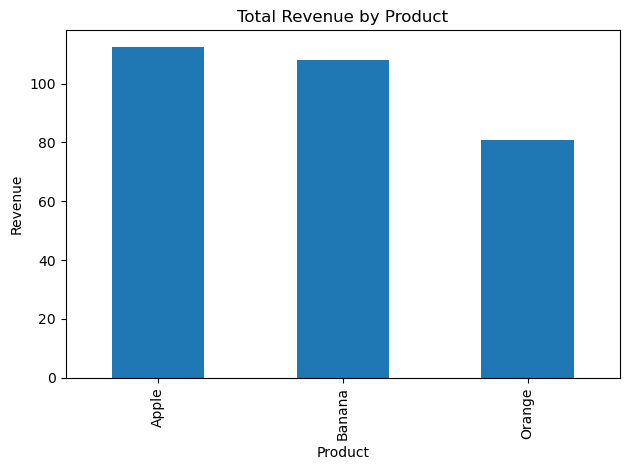

In [13]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Total Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

In [14]:
plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>